In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
cars = pd.read_csv('Cars.csv')

In [4]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [5]:
cars.tail()

,HP,MPG,VOL,SP,WT
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [6]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [8]:
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

### Preparing  model

In [9]:
import statsmodels.formula.api as smf
model =  smf.ols('MPG~HP+VOL+SP+WT',data = cars).fit()

In [10]:
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [11]:
print(model.tvalues, '\n',model.pvalues )

Intercept    2.058841
HP          -5.238735
VOL         -0.590970
SP           2.499880
WT           0.236541
dtype: float64 
 Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64


In [12]:
(model.rsquared,model.rsquared_adj)

(0.7705372737359844, 0.7584602881431415)

### Simple Linear Regression Models

In [13]:
#model volume
ml_v=smf.ols('MPG~VOL',data=cars).fit()

#t and p-values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [14]:
ml_w=smf.ols('MPG~WT',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [15]:
(ml_v.rsquared,ml_v.rsquared_adj)

(0.27990086511227064, 0.27078568618964105)

In [16]:
(ml_w.rsquared,ml_w.rsquared_adj)

(0.2774751389270125, 0.26832925460963286)

In [ ]:
#for calculating individualy the accuracy will be less beacause there is not only a single independent variable ,more than 1 is there ,that is multicolinearity

In [17]:
ml_wv = smf.ols('MPG~WT+VOL',data=cars).fit()
print(ml_w.tvalues, '\n',ml_wv.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [ ]:
#so the problem is while the WT and VOL are come together

### Correlation Matrix

In [18]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


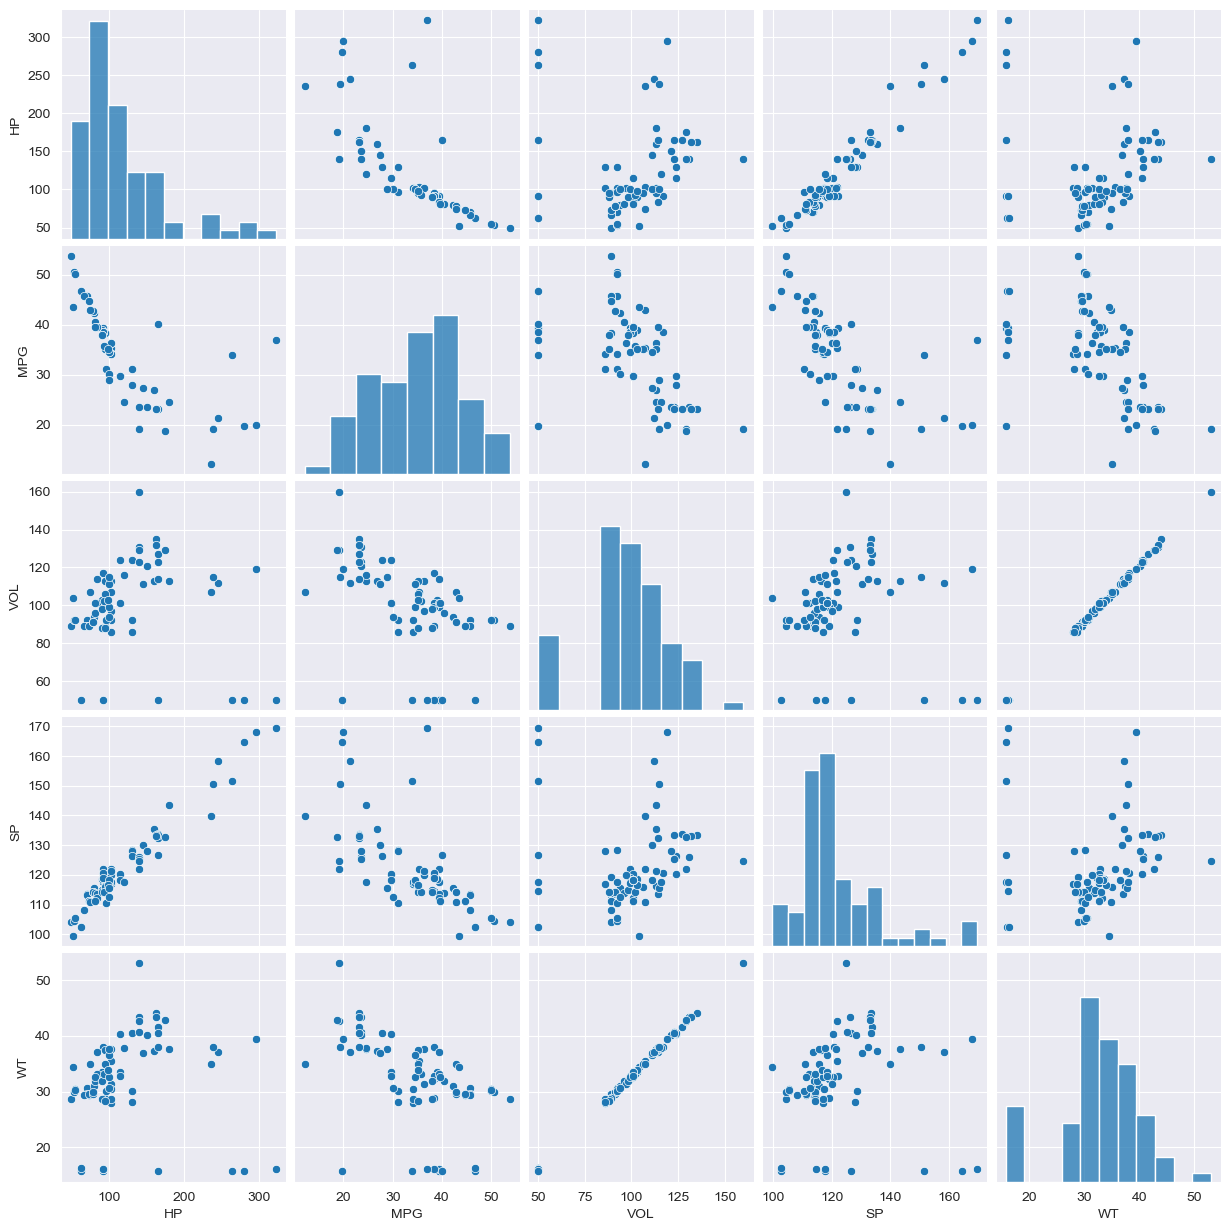

In [20]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)
plt.show()

### Calculating VIF

In [21]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~WT+HP+SP',data=cars).fit().rsquared
vif_vol  = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~VOL+HP+WT',data = cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

# Storing vif values in a data frame
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


### Subset Selection

### A/C

In [24]:
#Build model with WT
import statsmodels.formula.api as smf
model1 = smf.ols('MPG~WT+HP+SP',data=cars).fit()
f'AIC:{model1.aic}, rsq_model1:{model.rsquared}'

'AIC:477.9279049354879, rsq_model1:0.7705372737359844'

In [25]:
(model1.rsquared,model1.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [29]:
model2 = smf.ols('MPG~VOL+HP+SP',data=cars).fit()
f'AIC:{model2.aic}, rsq_model2:{model2.rsquared}'

'AIC:475.9875158854609, rsq_model2:0.770368341321302'

In [30]:
(model2.rsquared,model2.rsquared_adj)

(0.770368341321302, 0.7614216533208333)

### Model Deletion Diagnostics
### Detecting Influencers/Outlirs
### Cook's Distance

In [35]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

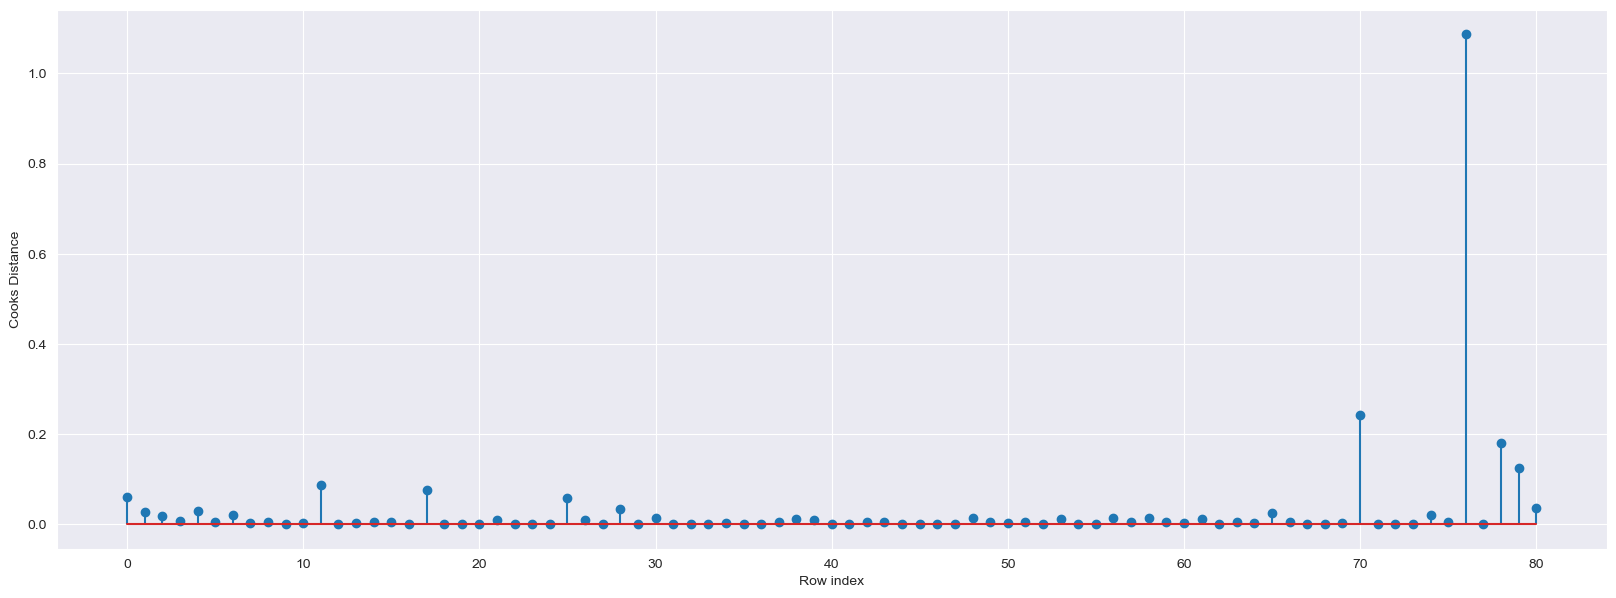

In [36]:
#plot the influencers value using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.0865193998180043)

### High Influence points

In [39]:
cars.shape

(81, 5)

In [40]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3 *((k+1)/n)
leverage_cutoff

0.2222222222222222

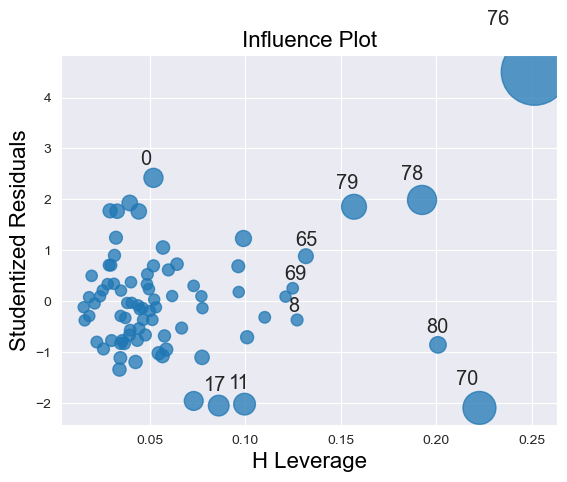

In [41]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

sm.graphics.influence_plot(model)
plt.show()

In [42]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947
